In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# New York City Airbnb Open Data

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38821 entries, 0 to 38820
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           38821 non-null  int64  
 1   id                              38821 non-null  int64  
 2   name                            38821 non-null  object 
 3   host_id                         38821 non-null  int64  
 4   host_name                       38821 non-null  object 
 5   neighbourhood_group             38821 non-null  object 
 6   neighbourhood                   38821 non-null  object 
 7   latitude                        38821 non-null  float64
 8   longitude                       38821 non-null  float64
 9   room_type                       38821 non-null  object 
 10  price                           38821 non-null  int64  
 11  minimum_nights                  38821 non-null  int64  
 12  number_of_reviews               

In [8]:
for cols in df.columns:
    print('column : ',cols)
    print(df[cols].value_counts().head(),'\n--------------------------------------')

column :  id
15286645    1
21476604    1
11967737    1
19830008    1
19907826    1
Name: id, dtype: int64 
--------------------------------------
column :  name
Home away from home                 12
Loft Suite @ The Box House Hotel    11
Private Room                        10
Brooklyn Apartment                   9
Cozy Brooklyn Apartment              8
Name: name, dtype: int64 
--------------------------------------
column :  host_id
219517861    207
61391963      79
16098958      61
137358866     51
7503643       49
Name: host_id, dtype: int64 
--------------------------------------
column :  host_name
Michael         335
David           309
John            250
Alex            229
Sonder (NYC)    207
Name: host_name, dtype: int64 
--------------------------------------
column :  neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64 
--------------------------------

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


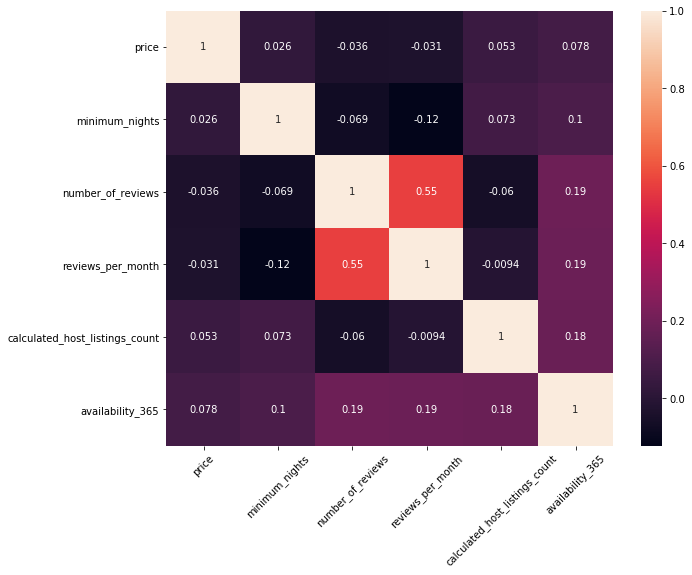

In [10]:
plt.figure(figsize=(10,8))
grph = sns.heatmap(df.drop(['id','host_id','latitude','longitude'],axis=1).corr(),annot=True)
grph.set_xticklabels(grph.get_xticklabels(), rotation=45)
plt.show()

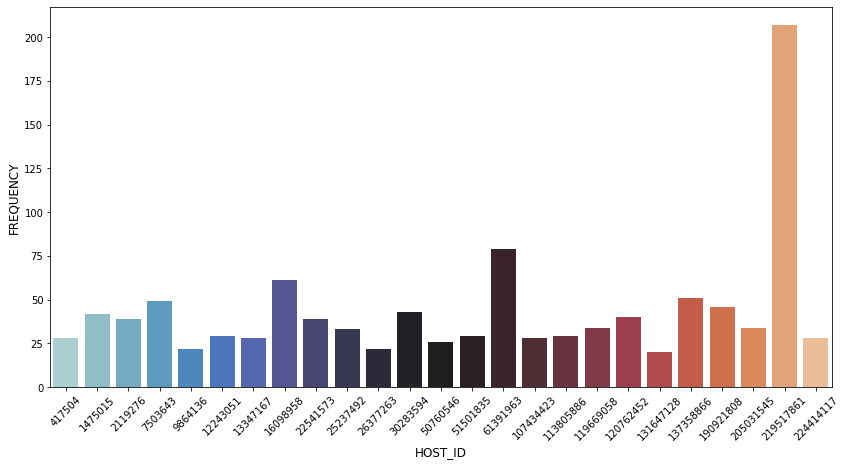

In [11]:
hosts = df['host_id'].value_counts().reset_index()[:25]        
plt.figure(figsize=(14,7))
grph = sns.barplot(x='index',y='host_id',data=hosts, palette='icefire')
grph.set_xticklabels(grph.get_xticklabels(), rotation=45)
plt.xlabel("HOST_ID", fontsize = 12)
plt.ylabel("FREQUENCY", fontsize = 12)
plt.show()

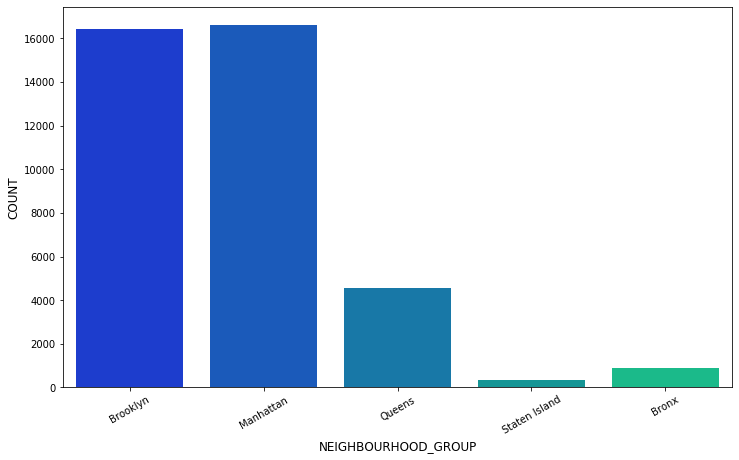

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(x = df["neighbourhood_group"], palette = "winter")
plt.xlabel("NEIGHBOURHOOD_GROUP", fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(rotation = 30)
plt.show()

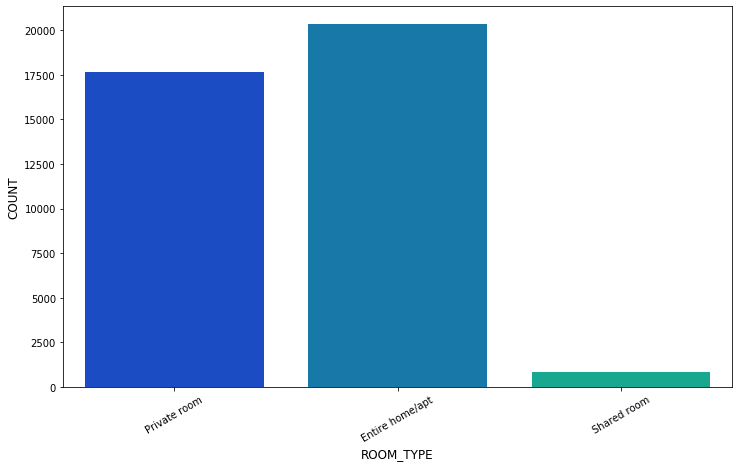

In [13]:
plt.figure(figsize=(12,7))
sns.countplot(x = df["room_type"], palette = "winter")
plt.xlabel("ROOM_TYPE", fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(rotation = 30)
plt.show()

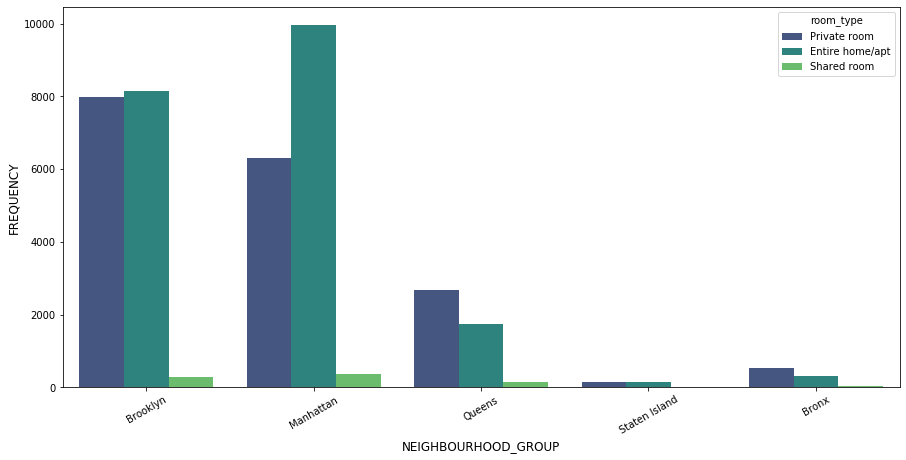

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x = df["neighbourhood_group"], hue = df["room_type"], palette = "viridis")
plt.xlabel("NEIGHBOURHOOD_GROUP", fontsize = 12)
plt.ylabel("FREQUENCY", fontsize = 12)
plt.xticks(rotation = 30)
plt.show()

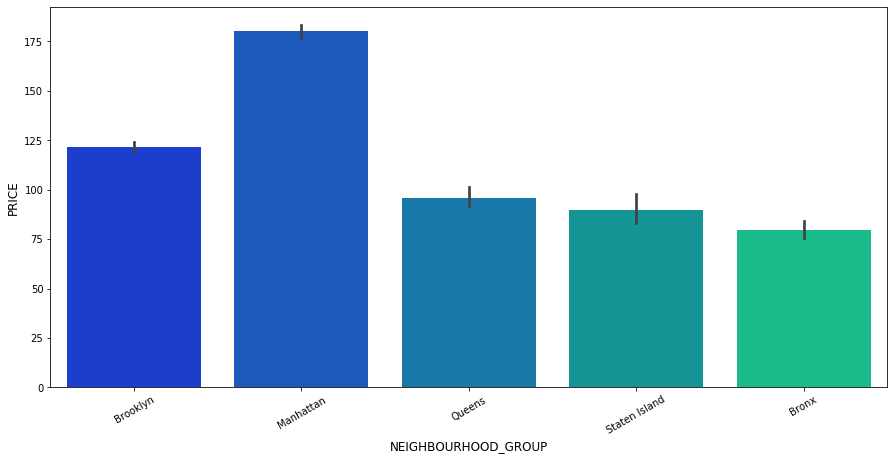

In [15]:
plt.figure(figsize=(15,7))
sns.barplot(x = df["neighbourhood_group"], y = df["price"], palette = "winter")
plt.xlabel("NEIGHBOURHOOD_GROUP", fontsize = 12)
plt.ylabel("PRICE", fontsize = 12)
plt.xticks(rotation = 30)
plt.show()

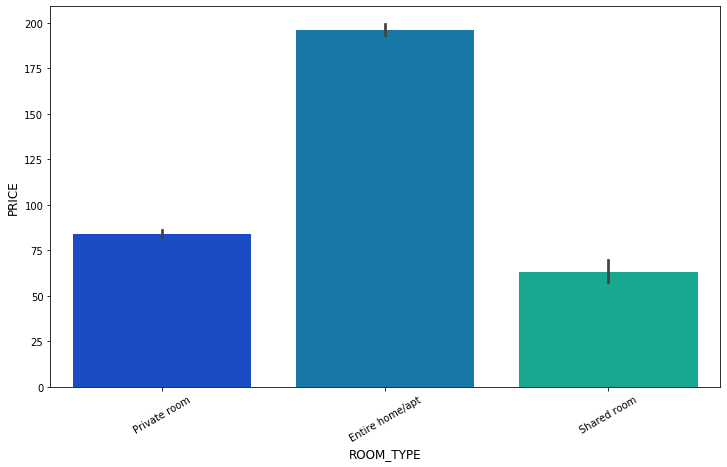

In [16]:
plt.figure(figsize=(12,7))
sns.barplot(x = df["room_type"], y = df['price'], palette = "winter")
plt.xlabel("ROOM_TYPE", fontsize = 12)
plt.ylabel("PRICE", fontsize = 12)
plt.xticks(rotation = 30)
plt.show()

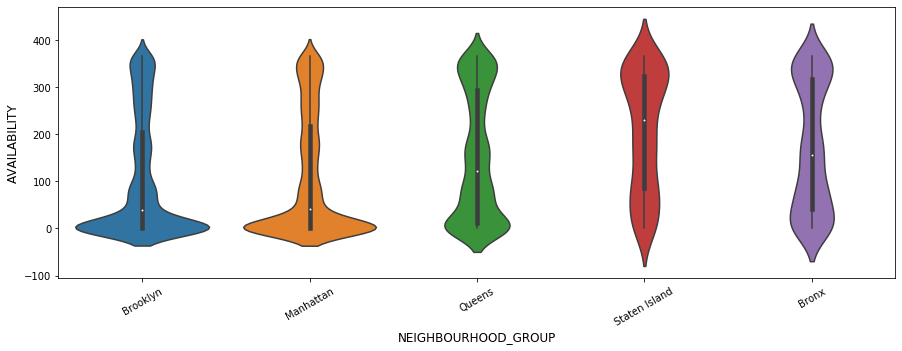

In [17]:
plt.figure(figsize=(15,5))
sns.violinplot(x='neighbourhood_group', y='availability_365', data=df)
plt.xlabel("NEIGHBOURHOOD_GROUP", fontsize = 12)
plt.ylabel("AVAILABILITY", fontsize = 12)
plt.xticks(rotation = 30)
plt.show()

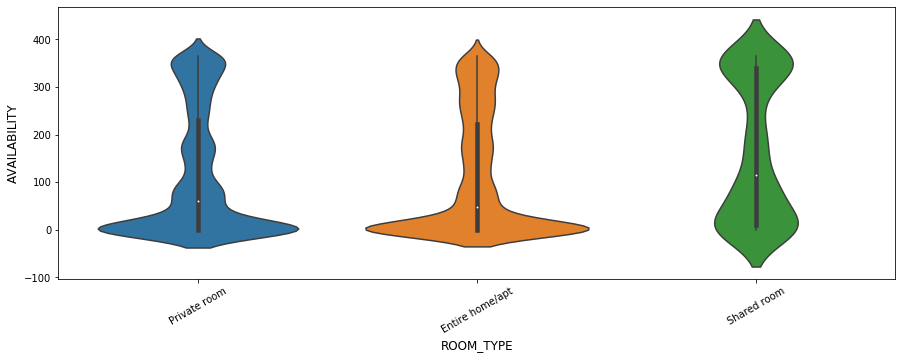

In [18]:
plt.figure(figsize=(15,5))
sns.violinplot(x='room_type', y='availability_365', data=df)
plt.xlabel("ROOM_TYPE", fontsize = 12)
plt.ylabel("AVAILABILITY", fontsize = 12)
plt.xticks(rotation = 30)
plt.show()

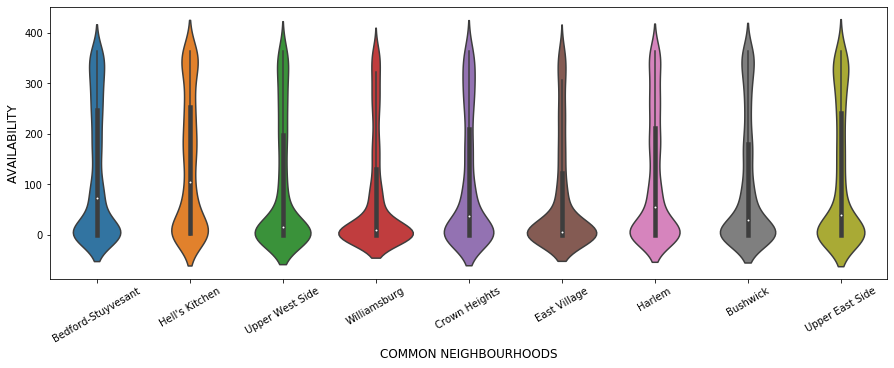

In [19]:
neigh = df['neighbourhood'].value_counts()
plt.figure(figsize=(15,5))
sns.violinplot(x='neighbourhood', y='availability_365', data=df[df.neighbourhood.isin(list(neigh[neigh >=1200].index))])
plt.xlabel("COMMON NEIGHBOURHOODS", fontsize = 12)
plt.ylabel("AVAILABILITY", fontsize = 12)
plt.xticks(rotation = 30)
plt.show()

# International football results from 1872 to 2021


In [20]:
df = pd.read_csv('results.csv')

In [21]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [22]:
df['date'] = df['date'].astype('datetime64[ns]')

In [23]:
df['year'] = df['date'].dt.year
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41876 entries, 0 to 41875
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        41876 non-null  datetime64[ns]
 1   home_team   41876 non-null  object        
 2   away_team   41876 non-null  object        
 3   home_score  41876 non-null  int64         
 4   away_score  41876 non-null  int64         
 5   tournament  41876 non-null  object        
 6   city        41876 non-null  object        
 7   country     41876 non-null  object        
 8   neutral     41876 non-null  bool          
 9   year        41876 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 2.9+ MB


In [25]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
dtype: int64

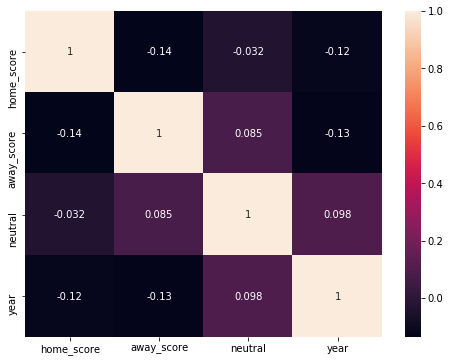

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [27]:
df.describe()

,home_score,away_score,year
count,41876.000000,41876.000000,41876.000000
mean,1.744293,1.186503,1990.619376
std,1.752248,1.403053,24.347059
min,0.000000,0.000000,1872.000000
25%,1.000000,0.000000,1978.000000
50%,1.000000,1.000000,1997.000000
75%,2.000000,2.000000,2009.000000
max,31.000000,21.000000,2020.000000


In [28]:
away_team=pd.DataFrame(df.groupby('away_team')['home_score'].count().index)
away_score=pd.DataFrame(df.groupby('away_team')['home_score'].count().values,columns=['Score'])
away_score_team=pd.concat([away_team,away_score],axis=1)

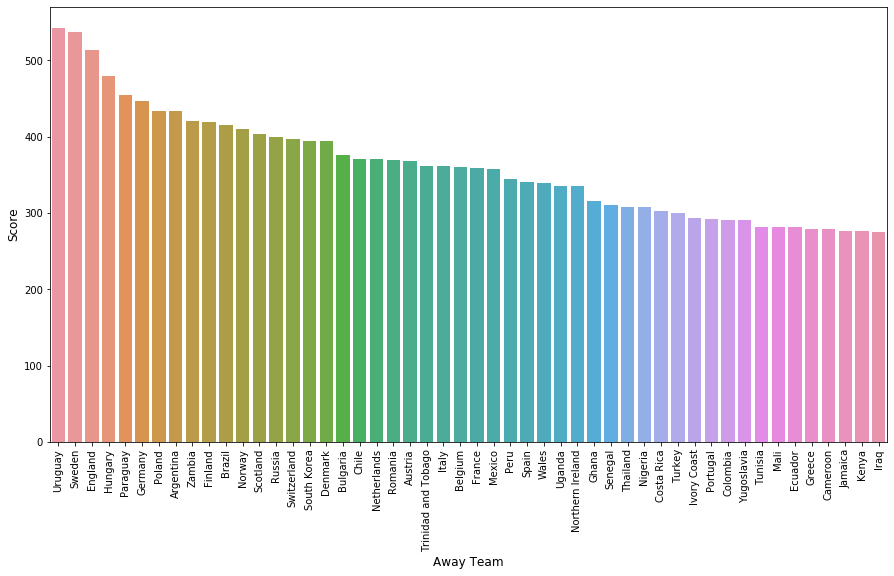

In [29]:
plt.figure(figsize=(15,8))
away_score_team=away_score_team.sort_values(by='Score',ascending=False)
sns.barplot(x=away_score_team.away_team[:50],y=away_score_team.Score[:50])
plt.xlabel("Away Team", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

In [30]:
df['tournament'].value_counts()

Friendly                                17136
FIFA World Cup qualification             7257
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
World Unity Cup                             4
AFF Championship qualification              2
Copa América qualification                  2
Atlantic Heritage Cup                       2
Name: tournament, Length: 112, dtype: int64

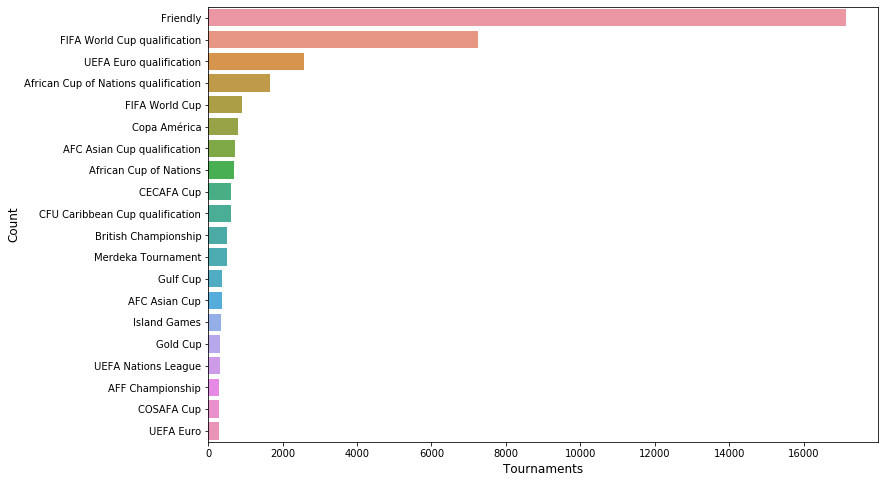

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['tournament'].value_counts().values[:20],y=df['tournament'].value_counts().index[:20], orient='h')
plt.xlabel("Tournaments", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=0)
plt.show()

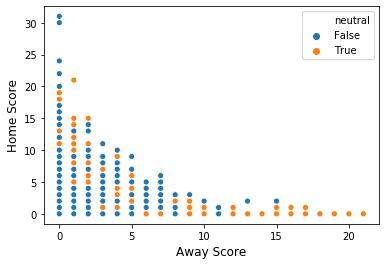

In [32]:
sns.scatterplot(y="home_score", x="away_score",hue="neutral",data=df)
plt.xlabel("Away Score", fontsize = 12)
plt.ylabel("Home Score", fontsize = 12)
plt.show()

In [33]:
def winner(row):
    if row['home_score'] > row['away_score']: return row['home_team'] 
    elif row['home_score'] < row['away_score']: return row['away_team']
    else: return '- draw -'
    
def loser(row):
    if row['home_score'] < row['away_score']: return row['home_team'] 
    elif row['home_score'] > row['away_score']: return row['away_team']
    else: return '- draw -'

    
df['winner'] = df.apply(lambda row: winner(row), axis=1) 
df['loser'] = df.apply(lambda row: loser(row), axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,- draw -,- draw -
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,- draw -,- draw -
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,England


In [34]:
winners = pd.value_counts(df.winner)
winners = winners.drop('- draw -')
winners.head(20)

Brazil         629
England        577
Germany        558
Argentina      529
Sweden         503
South Korea    455
Mexico         442
Hungary        439
Italy          428
France         423
Spain          409
Netherlands    402
Uruguay        384
Scotland       374
Denmark        361
Russia         358
Poland         355
Belgium        339
Austria        333
Zambia         330
Name: winner, dtype: int64

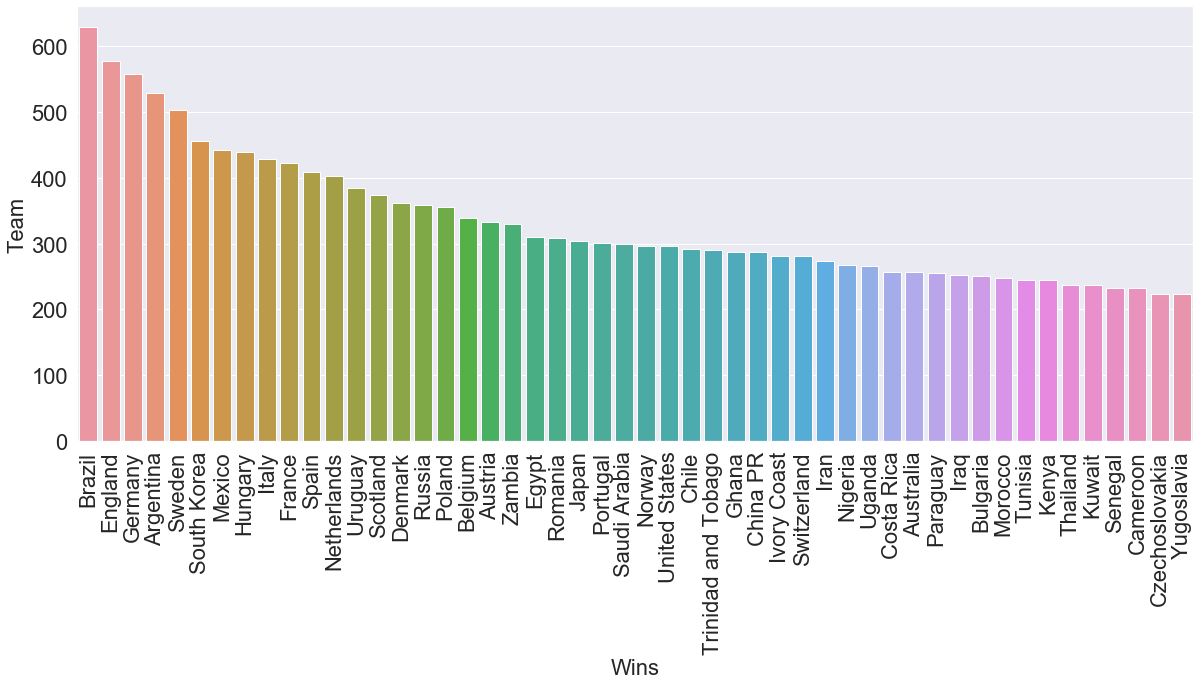

In [35]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=2)
sns.barplot(y = winners[:50].tolist(), x = winners[:50].index.tolist())
plt.xlabel("Wins", fontsize = 22)
plt.ylabel("Team", fontsize = 22)
plt.xticks(rotation=90)
plt.show()

In [36]:
def dec(row):
    return int(row['year']) - int(row['year'])%10

In [37]:
df['decade'] =  df.apply(lambda row: dec(row), axis=1)

In [38]:
df.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,loser,decade
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,- draw -,- draw -,1870
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,England,Scotland,1870
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,England,1870
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,- draw -,- draw -,1870
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,England,1870
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876,Scotland,Wales,1870
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877,Scotland,England,1870
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877,Scotland,Wales,1870
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878,Scotland,England,1870
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1878,Scotland,Wales,1870


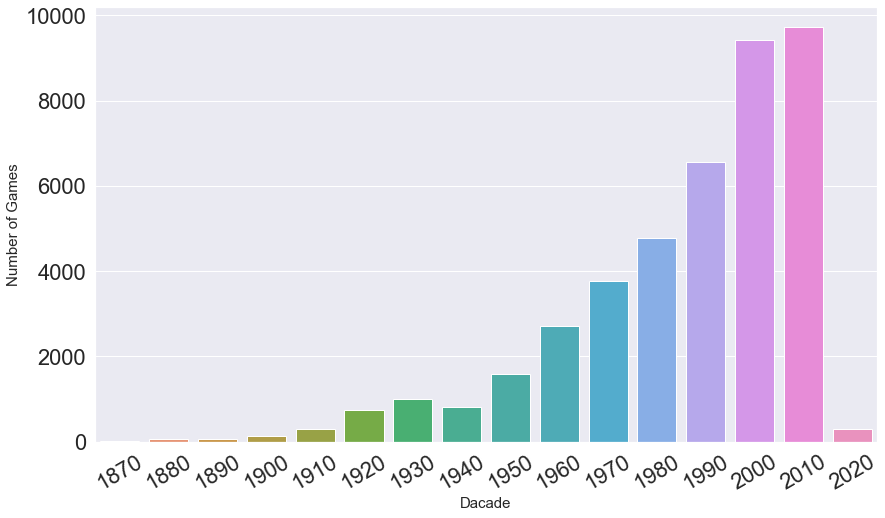

In [39]:
plt.figure(figsize=(14,8))
sns.countplot(x=df['decade'])
sns.set(font_scale=1)
plt.xlabel("Dacade", fontsize = 15)
plt.ylabel("Number of Games", fontsize = 15)
plt.xticks(rotation=30)
plt.show()

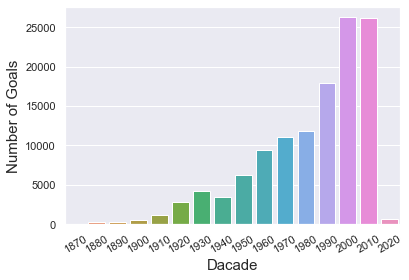

In [40]:
# Total Goals Scored
df['Goals'] = df['home_score']+df['away_score']
temp = df.groupby('decade')['Goals'].sum()
sns.barplot(temp.index, temp.values)
plt.xlabel("Dacade", fontsize = 15)
plt.ylabel("Number of Goals", fontsize = 15)
plt.xticks(rotation=30)
plt.show()

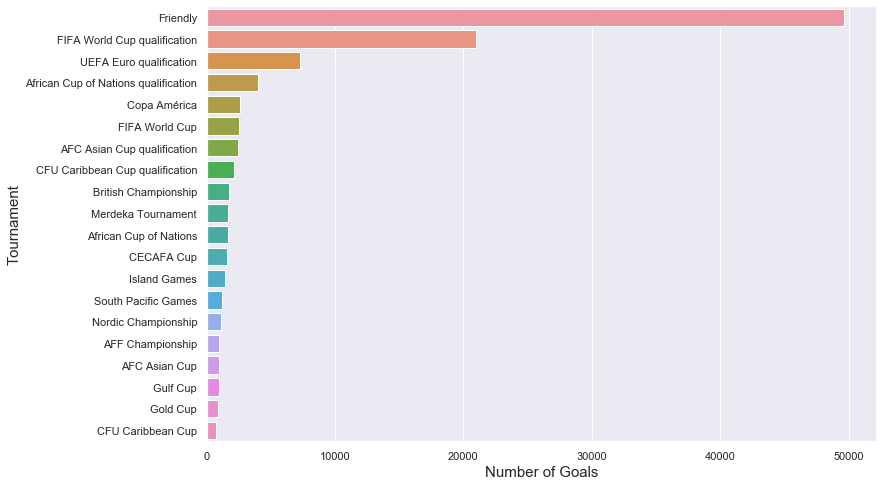

In [41]:
plt.figure(figsize=(12,8))
temp = df.pivot_table('Goals', index = 'tournament', aggfunc = 'sum')
temp = temp.sort_values('Goals', ascending  = False)
sns.barplot(x = temp['Goals'][:20], y = temp[:20].index)
plt.xlabel("Number of Goals", fontsize = 15)
plt.ylabel("Tournament", fontsize = 15)
plt.xticks(rotation=0)
plt.show()